<a href="https://colab.research.google.com/github/Lakshmimadira/HousePrice/blob/main/Houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

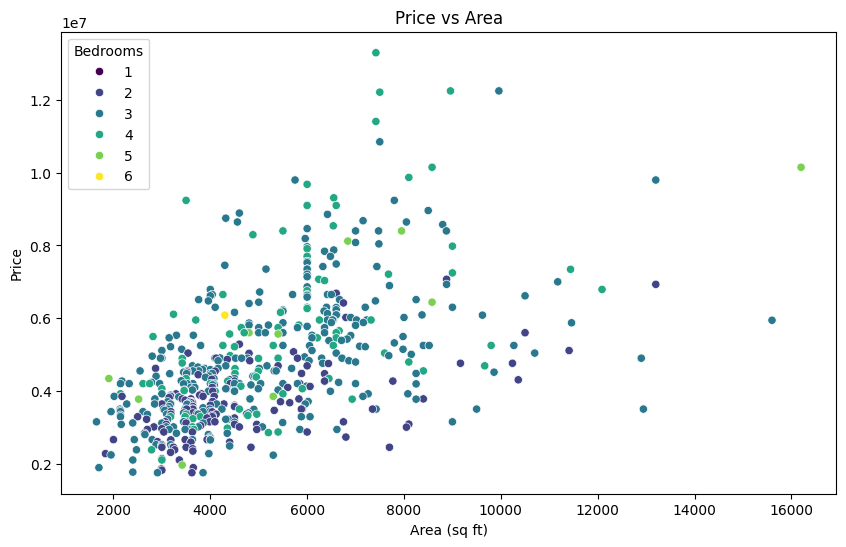

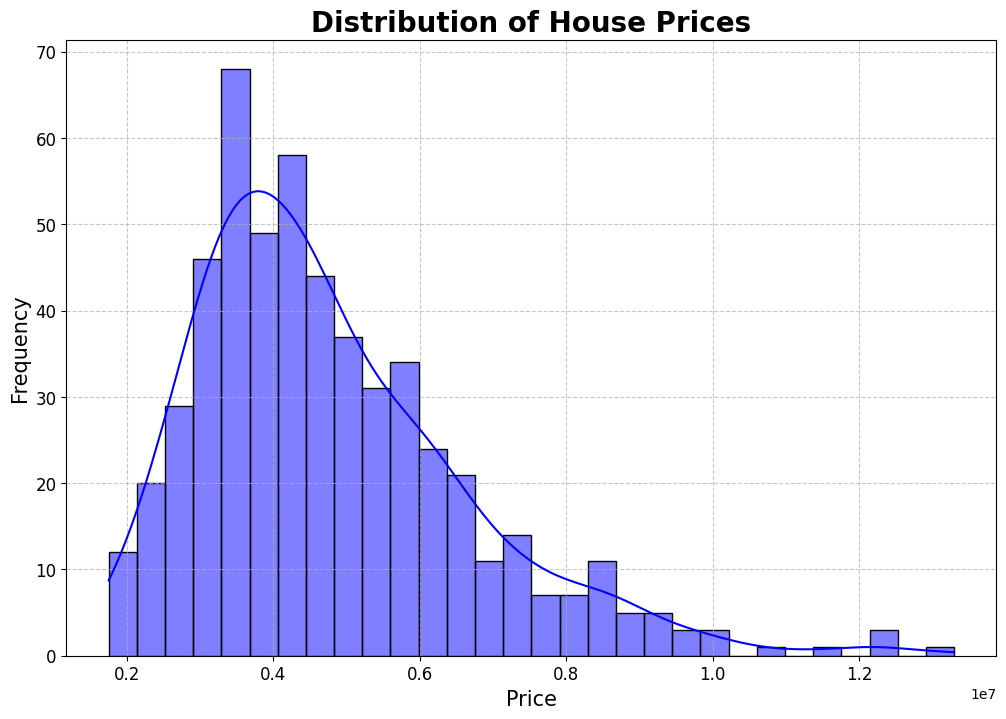

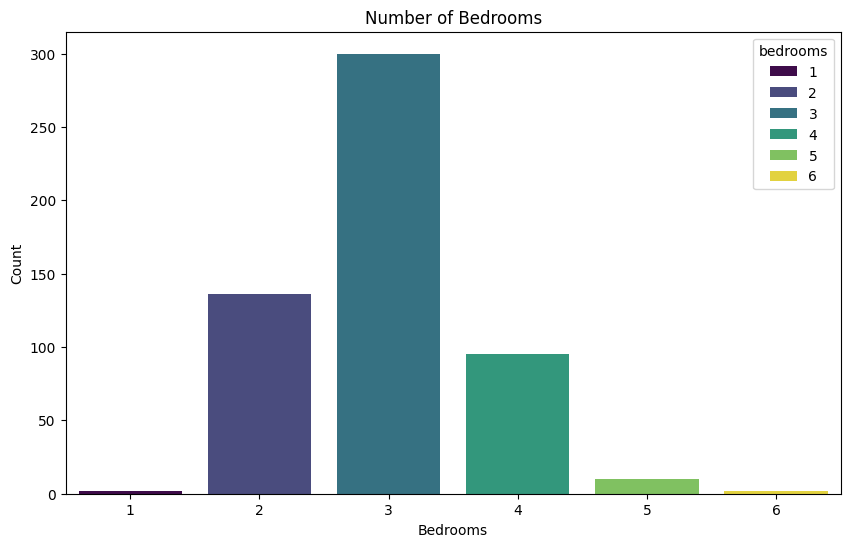

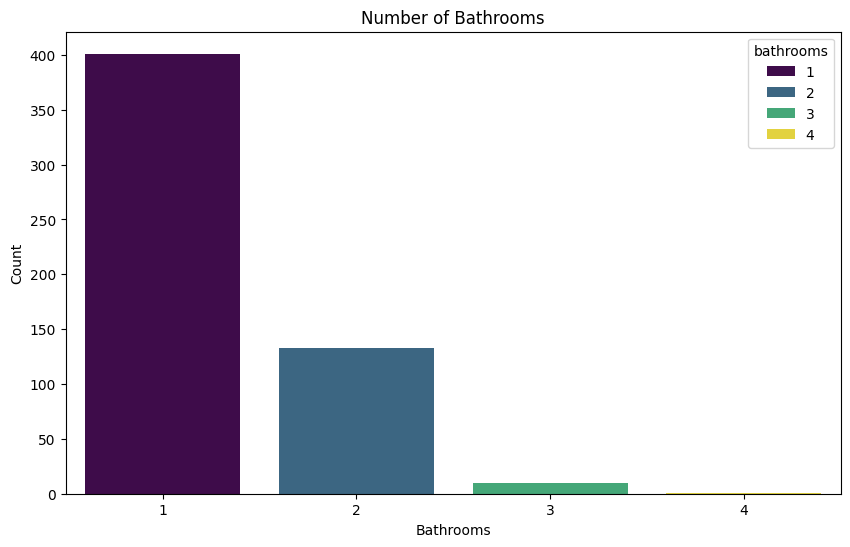

Mean Squared Error: 2750040479309.0522
R-Squared: 0.4559299118872445


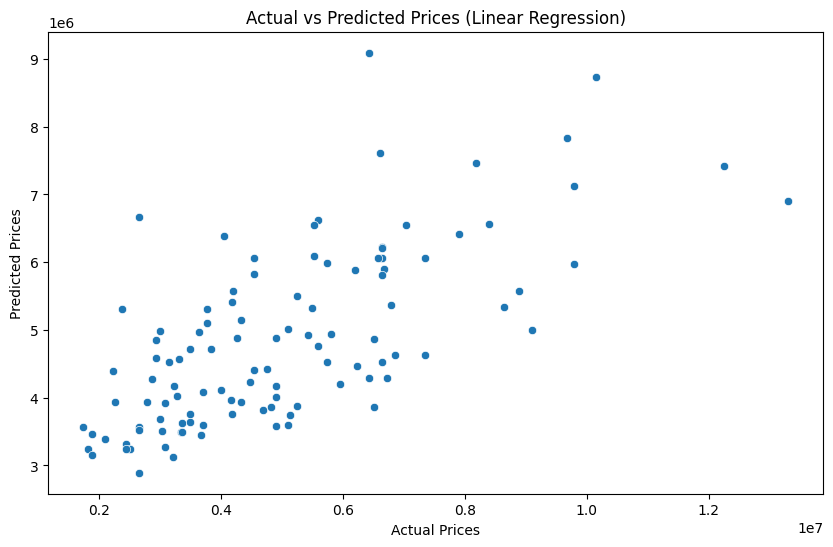

In [3]:
#Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

#Load and Explore Data
df=pd.read_csv("/content/Housing.csv")
#Display Rows of Dataset
df.head()

#The describe() function
df.describe()

#Check for infinite values and replace them with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


#Drop rows with NaN values
df.dropna(subset=['price'], inplace=True)

#Scatter Plot of Price vs Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

#Distribution Plot of Price
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

#Count Plot of Bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df,hue='bedrooms', palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

#Count Plot of Bathrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df,hue='bathrooms', palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

#Selecting relevant columns
df = df[['price', 'area', 'bedrooms', 'bathrooms']]

#Creating Independent and Dependent Variables

X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing the linear regression model
model = LinearRegression()
#Training the model
model.fit(X_train, y_train)

#Making predictions
y_pred = model.predict(X_test)
y_pred

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

#Visualizing the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()
